### psd visual illustration

This notebook is used for demo in power spectrum density visualization

In [1]:
import sys
sys.path.append('/home/yat-lok/workspace/tvbtools/')
from tools.signaltools import SignalToolkit
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')

In [2]:
### just for your reference
# def psd(self, data, sampling_interval = None, visual=False, xlim=100.,axes=None, fNQ = None, normalization = True, *args, **kwargs):
#         """
#         This function is for power spectrum density analysis
        
#         Parameters:
#         ---------------------
#             data: list or array
#                 LFPs single channel signal
#             sampling interval: int or float
#                 sampling interval is the reciprocal of sampling frequency (1/fs)
#             visual: boole, default is False
#                 execute the visualization or not
#             xlim: int or float
#                 for better visualize frequency band in plot
#         Returns:
#         ----------------------
#             Freq axis, PSD of the signal
#         """
#         if sampling_interval is None:
#             sampling_interval = self.sampling_interval
#         fs = 1/sampling_interval
#         if fNQ is None:
#             fNQ = int(fs/2)
#         data = np.array(data)
#         if normalization:
#             data = data-np.mean(data)
#         fourier = np.fft.fft(data, n=fNQ)
#         fourier = fourier[0:int(fNQ/2)]
#         faxis  = np.arange(int(fNQ/2)) * (fs/fNQ)

#         if visual:
#             if axes is None:
#                 fig = plt.figure(figsize=(15,5))
#                 axes = fig.add_subplot(111)
#             axes.plot(faxis, np.abs(fourier**2), *args, **kwargs)
#             axes.set_xlim([0, xlim])
#         return faxis, np.abs(fourier)**2

In [3]:
# generate a signal to testify whether our psd algorithm is working or not.

fs = 1000.0 # 1 kHz sampling frequency
F1 = 10 # First signal component at 10 Hz
F2 = 60 # Second signal component at 60 Hz
T = 10 # 10s signal length
N0 = -10 # Noise level (dB)

t = np.r_[0:T:(1/fs)] # Sample times

# Two Sine signal components at frequencies F1 and F2.
signal = np.sin(2 * F1 * np.pi * t) + np.sin(2 * F2 * np.pi * t) 

# White noise with power N0
signal += np.random.randn(len(signal)) * 10**(N0/20.0) 

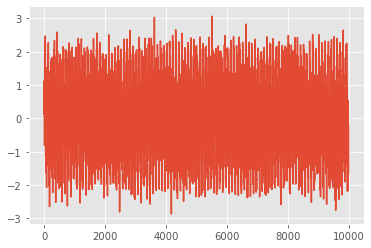

In [4]:
plt.plot(signal)

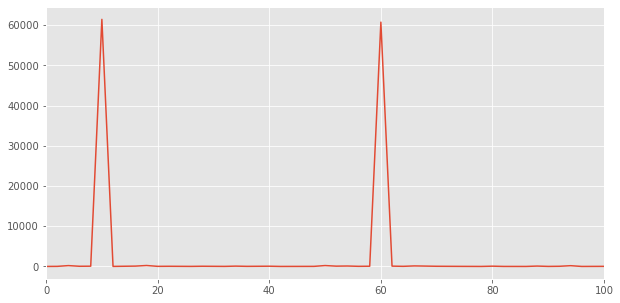

In [5]:
subject = SignalToolkit()
fig = plt.figure(figsize=(10,5))
#plt.title("lateralization comparison between pcg and other limbic regions")
axes = fig.add_subplot(111)
faxis, fourier = subject.psd(data =signal, sampling_interval = 1/1000, xlim=100, visual=True, axes=axes)